## Importing Libraries 

In [4]:
## loading and preprocessing data
import pandas as pd 
import numpy as np 

## visualization of data
import matplotlib.pyplot as plt 
import seaborn as sns 

## building validation framework 
from sklearn.model_selection import train_test_split 

## categorical encoding 
from sklearn.feature_extraction import DictVectorizer

## regression model 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor

## metrics 
from sklearn.metrics import root_mean_squared_error, mean_squared_error

## Loading Data

In [6]:
## loading dataset
data = pd.read_csv("Datasets/car_price_datatset.csv")

## create a copy 
df = data.copy()

In [7]:
# checking shape
df.shape

(11914, 16)

In [8]:
# checking first rows
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [9]:
# checking last rows
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [10]:
# checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [11]:
# check for description
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [12]:
# check for missing values
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [13]:
# check for duplicates
df.duplicated().sum()

715

In [14]:
# checking for type on columns
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [15]:
## return the total counts of unique values in each column 
df.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [16]:
for each_name in df.columns: 
    print(each_name)
    print(df[each_name].unique())

Make
['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']
Model
['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5 Series Gran Turismo' '5 Series'
 '500-Class' '500e' '500' '500L' '500X' '550' '560-Class' '570S' '575M'
 '57' '599' '5' '6 Series Gran Coupe' '6 Series' '600-Class' '6000'
 '612 Scaglietti' '62

## Data Preprocessing 

In [18]:
# change uppercase to lower case and spaces to _ in columns
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [19]:
df['year'] = df['year'].astype('category')
df['number_of_doors'] = df['number_of_doors'].astype('category')
df['vehicle_size'] = df['vehicle_size'].astype('category')
df['vehicle_style'] = df['vehicle_style'].astype('category')
df['make'] = df['make'].astype('category')
df['transmission_type'] = df['transmission_type'].astype('category')
df['market_category'] = df['market_category'].astype('category')
df['engine_cylinders'] = df['engine_cylinders'].astype('category')
df['engine_fuel_type'] = df['engine_fuel_type'].astype('category')
df['model'] = df['model'].astype('category')

In [20]:
## lets fill in col for engine_cylinders 
df['engine_cylinders'] = df['engine_cylinders'].fillna(df['engine_cylinders'].value_counts().index[0])
## 
df['number_of_doors'] = df['number_of_doors'].fillna(df['number_of_doors'].value_counts().index[0])
#
df['market_category'] = df['market_category'].fillna(df['market_category'].value_counts().index[0])
#
df['engine_fuel_type'] = df['engine_fuel_type'].fillna(df['engine_fuel_type'].value_counts().index[0])

In [21]:
df['engine_hp'] = df['engine_hp'].fillna(df['engine_hp'].mean())
df.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
market_category      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

## Descriptive Analysis

In [23]:
df.describe().round()

,engine_hp,highway_mpg,city_mpg,popularity,msrp
count,11914.0,11914.0,11914.0,11914.0,11914.0
mean,249.0,27.0,20.0,1555.0,40595.0
std,109.0,9.0,9.0,1442.0,60109.0
min,55.0,12.0,7.0,2.0,2000.0
25%,170.0,22.0,16.0,549.0,21000.0
50%,227.0,26.0,18.0,1385.0,29995.0
75%,300.0,30.0,22.0,2009.0,42231.0
max,1001.0,354.0,137.0,5657.0,2065902.0


In [24]:
numerical_cols = df.select_dtypes(include=['int', 'float'])

corr_matrix = numerical_cols.corr()

corr_matrix['msrp']

engine_hp      0.661644
highway_mpg   -0.160043
city_mpg      -0.157676
popularity    -0.048476
msrp           1.000000
Name: msrp, dtype: float64

In [25]:
# check available columns
df.columns


Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [26]:
print(df['msrp'].dtype)


int64


## Exploratory Data Analysis

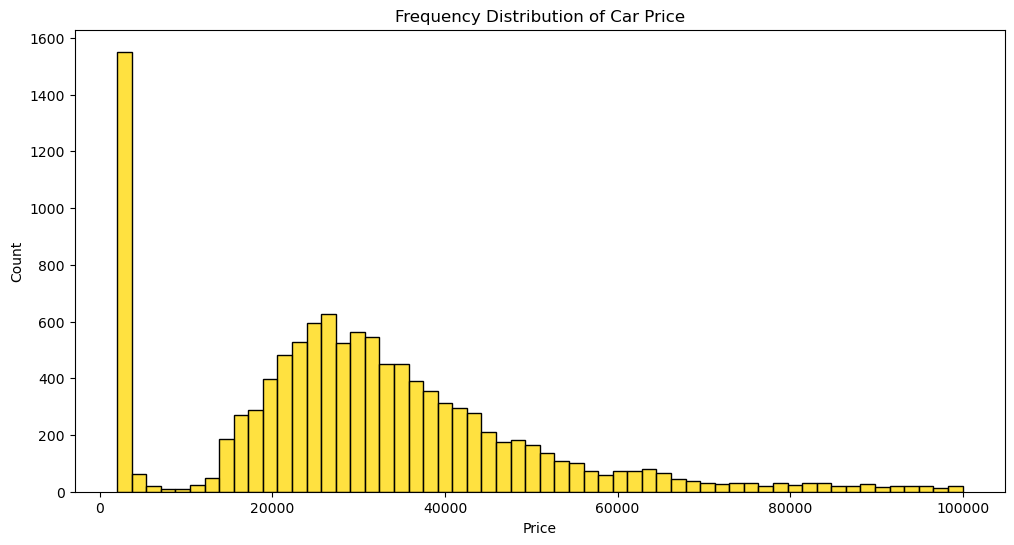

In [28]:
plt.figure(figsize=(12, 6))

plt.title('Frequency Distribution of Car Price')
plt.xlabel('Price')
plt.ylabel('Count') 

sns.histplot(df['msrp'][df['msrp'] < 100000], color='gold') 

plt.show()


In [29]:
# log transformation
log_price = np.log1p(df['msrp'])

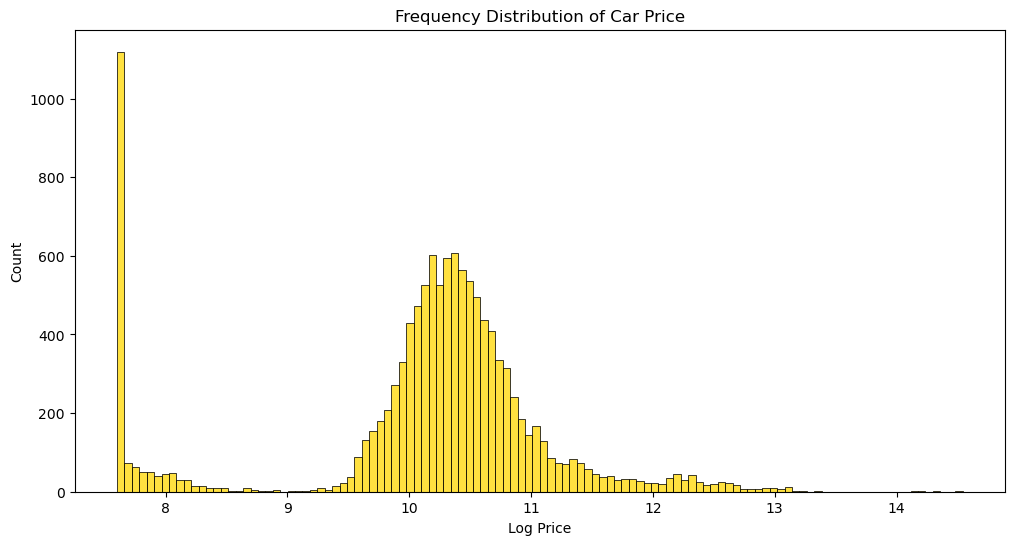

In [30]:
plt.figure(figsize=(12, 6))

plt.title('Frequency Distribution of Car Price')
plt.xlabel('Log Price')
plt.ylabel('Count') 

sns.histplot(log_price, color='gold') 

plt.show()

## Building A Validation Framework
    -Training Dataset 60%
    -Validation Dataset 20%
    -Testing Dataset 20%

In [32]:
df_train_full, df_test = train_test_split(df, test_size=0.2 , random_state=10)
df_train, df_valid = train_test_split(df_train_full, test_size=0.25, random_state=10) 

print(f'Size of Training Dataset {len(df_train)}')
print(f'Size of Validation Dataset {len(df_valid)}')
print(f'Size of Testing Dataset {len(df_test)}')


Size of Training Dataset 7148
Size of Validation Dataset 2383
Size of Testing Dataset 2383


In [33]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11118,Volvo,V60 Cross Country,2016,regular unleaded,250.0,5.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Luxury",Midsize,Wagon,28,20,870,44850
8136,Dodge,Ram Cargo,2003,regular unleaded,175.0,6.0,AUTOMATIC,rear wheel drive,3.0,Crossover,Large,Cargo Van,15,13,1851,22190
3064,Honda,CR-V,2016,regular unleaded,185.0,4.0,AUTOMATIC,front wheel drive,4.0,Crossover,Compact,4dr SUV,33,26,2202,24545
3476,Dodge,Dakota,2010,regular unleaded,210.0,6.0,AUTOMATIC,four wheel drive,4.0,Flex Fuel,Compact,Crew Cab Pickup,18,14,1851,29275
271,Nissan,350Z,2007,regular unleaded,306.0,6.0,MANUAL,rear wheel drive,2.0,High-Performance,Compact,Coupe,25,18,2009,29600


## Data Preprocessing 2

In [35]:
y_train = np.log1p(df_train['msrp']).values
y_valid = np.log1p(df_valid['msrp']).values
y_test = np.log1p(df_test['msrp']).values

In [36]:
y_valid

array([11.03812636, 11.87340018, 10.42794977, ..., 11.70808921,
        9.88129307, 10.06458547])

In [37]:
del df_train['msrp']
del df_valid['msrp']


In [38]:
## select the cols with int, float, and category 
df_train_bl = df_train.select_dtypes(include=['int', 'float', 'category'])
df_valid_bl = df_valid.select_dtypes(include=['int', 'float', 'category']) 


In [39]:
df_train_bl.dtypes

make                 category
model                category
year                 category
engine_fuel_type     category
engine_hp             float64
engine_cylinders     category
transmission_type    category
number_of_doors      category
market_category      category
vehicle_size         category
vehicle_style        category
highway_mpg             int64
city_mpg                int64
popularity              int64
dtype: object

In [40]:
## convert the dataframe to a dictionary format 

dict_train_bl = df_train_bl.to_dict(orient='records')
dict_valid_bl = df_valid_bl.to_dict(orient='records')

In [41]:
dv = DictVectorizer(sparse=False) 

dv.fit(dict_train_bl) 

DictVectorizer(sparse=False)

In [42]:
X_train_bl = dv.transform(dict_train_bl) 
X_valid_bl = dv.transform(dict_valid_bl) 

## Training Baseline Algorithms
    -Logic Regression
    -Decision Tree Regressor
    -Random Forest Regressor
    -Adaboost Regression
    

### Linear Regression Model

In [45]:
## instance of the model 
lr_bl_model = LinearRegression() 

## traing the model 
lr_bl_model.fit(X_train_bl, y_train) 

LinearRegression()

## Model Evaluation

In [47]:
## generate validation predictions 
y_valid_pred = lr_bl_model.predict(X_valid_bl) 

In [48]:
## 
lr_rmse_bl = root_mean_squared_error(y_valid, y_valid_pred) 

print(f'Baseline Validation Metic {round(lr_rmse_bl, 2) * 100} %')

Baseline Validation Metic 52994340.0 %


## Training A Decision Tree Model

In [50]:
## create instance 
dt_model_bl = DecisionTreeRegressor(random_state=11)

dt_model_bl.fit(X_train_bl, y_train) 

DecisionTreeRegressor(random_state=11)

In [51]:
## generate validation prediction 
y_valid_pred = dt_model_bl.predict(X_valid_bl) 

In [52]:
dt_rmse_bl = root_mean_squared_error(y_valid, y_valid_pred)
print(f'Decision Tree Baseline Validation Metic {round(dt_rmse_bl, 2) * 100} %')

Decision Tree Baseline Validation Metic 13.0 %


## Random Forest Regression

In [54]:
## create instance 
rf_model_bl = RandomForestRegressor(random_state=11)

rf_model_bl.fit(X_train_bl, y_train)

## generate validation prediction 
y_valid_pred = rf_model_bl.predict(X_valid_bl) 

rf_rmse_bl = root_mean_squared_error(y_valid, y_valid_pred)
print(f'Random Regressor Baseline Validation Metic {round(rf_rmse_bl, 2) * 100} %')

Random Regressor Baseline Validation Metic 12.0 %


## Adaboost Regressor

In [56]:
## create instance 
ad_model_bl = AdaBoostRegressor(random_state=11)

ad_model_bl.fit(X_train_bl, y_train)

## generate validation prediction 
y_valid_pred = ad_model_bl.predict(X_valid_bl) 

ad_rmse_bl = root_mean_squared_error(y_valid, y_valid_pred)
print(f'AdaBoost Regressor Baseline Validation Metic {round(ad_rmse_bl, 2) * 100} %')

AdaBoost Regressor Baseline Validation Metic 30.0 %


## Gradient Boosting Model 

In [58]:
## create instance 
gb_model_bl = GradientBoostingRegressor(random_state=11)

gb_model_bl.fit(X_train_bl, y_train)

## generate validation prediction 
y_valid_pred = gb_model_bl.predict(X_valid_bl) 

gb_rmse_bl = root_mean_squared_error(y_valid, y_valid_pred)
print(f'Gradient Boosting Regressor Baseline Validation Metic {round(gb_rmse_bl, 2) * 100} %')

Gradient Boosting Regressor Baseline Validation Metic 16.0 %


## Bagging Model 

In [60]:
## create instance 
bg_model_bl = BaggingRegressor(random_state=11)

bg_model_bl.fit(X_train_bl, y_train)

## generate validation prediction 
y_valid_pred = bg_model_bl.predict(X_valid_bl) 

bg_rmse_bl = root_mean_squared_error(y_valid, y_valid_pred)
print(f'Bagging Regressor Baseline Validation Metic {round(bg_rmse_bl, 2) * 100} %')

Bagging Regressor Baseline Validation Metic 12.0 %


## Training & Testing Final Model

In [62]:
## select int, float, category features/attr/inputs 
df_train_fm = df_train_full.select_dtypes(include = ['int', 'float', 'category'])
df_test_fm = df_test.select_dtypes(include = ['int', 'float', 'category'])

## select our target columns, normalize and transform it to vector
y_train_fm = np.log1p(df_train_full['msrp']).values
y_test_fm = np.log1p(df_test['msrp']).values

## del the colms 
del df_train_full['msrp']
del df_test['msrp'] 

In [63]:
## convert to a dictionary format 
dict_train_fm = df_train_fm.to_dict(orient='records')
dict_test_fm = df_test_fm.to_dict(orient='records')

## training a dictVector 
dv = DictVectorizer(sparse=False)
dv.fit(dict_train_fm) 

## tranform to a matrix format 
X_train_fm = dv.transform(dict_train_fm) 
X_test_fm = dv.transform(dict_test_fm) 

In [64]:
## create a instance of the alg
rf_model_fm = RandomForestRegressor(random_state=11)

## training the model 
rf_model_fm.fit(X_train_fm, y_train_fm) 

RandomForestRegressor(random_state=11)

In [65]:
## generating the test prediction 
y_test_pred_fm = rf_model_fm.predict(X_test_fm)

In [66]:
## computing the final error metrics
rf_rmse_fm = root_mean_squared_error(y_test_fm, y_test_pred_fm)
print(f'Random Forest Model Final Test Metic {round(rf_rmse_fm, 2) * 100} %')

Random Forest Model Final Test Metic 0.0 %


## Save The Final Model

In [68]:
import pickle 

with open('car_price_prediction.bin', 'wb') as f_out: 
    pickle.dump((dv, rf_model_fm), f_out)